<H2>Analysis of Ferrari's race weekend performance at the 2024 Italian Grand Prix. </H2>

In [1]:
# import needed librares
import pandas as pd
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Section 1: Importing the Data</h3>

In [117]:
# Load the 2024 Monza qualifying session
qualifying = fastf1.get_session(2024, 'Monza', 'Q')

# Load the 2024 Monza race session
race = fastf1.get_session(2024, 'Monza', 'R')

# Load the data for both sessions
qualifying.load()
race.load()

# Load laps data into DataFrame
quali_df = qualifying.laps  
race_df = race.laps  


core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached d

<h4>Qualifying DataFrame info</h4>

In [118]:
quali_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:12.142000,NOR,4,NaT,1.0,1.0,0 days 00:14:16.306000,NaT,NaT,0 days 00:00:37.116000,0 days 00:00:32.914000,NaT,0 days 00:15:39.326000,0 days 00:16:12.142000,262.0,286.0,316.0,136.0,False,SOFT,1.0,True,McLaren,0 days 00:14:16.306000,2024-08-31 14:03:14.075,1,NaN,False,,False,False
1,0 days 00:17:32.053000,NOR,4,0 days 00:01:19.911000,2.0,1.0,NaT,NaT,0 days 00:00:26.484000,0 days 00:00:26.898000,0 days 00:00:26.529000,0 days 00:16:38.626000,0 days 00:17:05.524000,0 days 00:17:32.053000,325.0,337.0,307.0,346.0,True,SOFT,2.0,True,McLaren,0 days 00:16:12.142000,2024-08-31 14:05:09.911,1,NaN,False,,False,True
2,0 days 00:19:23.074000,NOR,4,0 days 00:01:51.021000,3.0,1.0,NaT,0 days 00:19:18.770000,0 days 00:00:32.371000,0 days 00:00:38.291000,0 days 00:00:40.359000,0 days 00:18:04.424000,0 days 00:18:42.715000,0 days 00:19:23.074000,217.0,231.0,NaN,256.0,False,SOFT,3.0,True,McLaren,0 days 00:17:32.053000,2024-08-31 14:06:29.822,1,NaN,False,,False,False
3,0 days 00:43:29.375000,NOR,4,NaT,4.0,2.0,0 days 00:41:40.139000,NaT,NaT,0 days 00:00:39.008000,0 days 00:00:31.591000,NaT,0 days 00:42:57.816000,0 days 00:43:29.443000,256.0,143.0,319.0,197.0,False,SOFT,1.0,True,McLaren,0 days 00:19:23.074000,2024-08-31 14:08:20.843,12,NaN,False,,False,False
4,0 days 00:44:49.102000,NOR,4,0 days 00:01:19.727000,5.0,2.0,NaT,NaT,0 days 00:00:26.395000,0 days 00:00:26.865000,0 days 00:00:26.467000,0 days 00:43:55.770000,0 days 00:44:22.635000,0 days 00:44:49.102000,325.0,337.0,314.0,349.0,True,SOFT,2.0,True,McLaren,0 days 00:43:29.375000,2024-08-31 14:32:27.144,1,NaN,False,,False,True


**Shape of df**

In [119]:
quali_df.shape

(276, 31)

**Columns in df**

In [120]:
quali_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

**Types of columns**

In [121]:
quali_df.dtypes

Time                  timedelta64[ns]
Driver                         object
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                     float64
Stint                         float64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
IsPersonalBest                   bool
Compound                       object
TyreLife                      float64
FreshTyre                        bool
Team                           object
LapStartTime          timedelta64[ns]
LapStartDate           datetime64[ns]
TrackStatus                    object
Position    

**Checking for null values**

In [122]:
quali_df.isnull().sum()

Time                    0
Driver                  0
DriverNumber            0
LapTime               100
LapNumber               0
Stint                   0
PitOutTime            184
PitInTime             184
Sector1Time            90
Sector2Time             0
Sector3Time            10
Sector1SessionTime     90
Sector2SessionTime      0
Sector3SessionTime     10
SpeedI1                 0
SpeedI2                 0
SpeedFL                92
SpeedST                 0
IsPersonalBest          0
Compound                0
TyreLife                0
FreshTyre               0
Team                    0
LapStartTime            0
LapStartDate            0
TrackStatus             0
Position              276
Deleted                 0
DeletedReason           0
FastF1Generated         0
IsAccurate              0
dtype: int64

<h4>Race DataFrame info</h4>

In [123]:
race_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:18.965000,LEC,16,0 days 00:01:28.179000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.989000,0 days 00:00:28.398000,NaT,0 days 00:56:50.708000,0 days 00:57:19.087000,316.0,313.0,311.0,300.0,False,MEDIUM,1.0,True,Ferrari,0 days 00:55:50.494000,2024-09-01 13:03:34.413,1,2.0,False,,False,False
1,0 days 00:58:44.361000,LEC,16,0 days 00:01:25.396000,2.0,1.0,NaT,NaT,0 days 00:00:27.707000,0 days 00:00:29.265000,0 days 00:00:28.424000,0 days 00:57:46.661000,0 days 00:58:15.926000,0 days 00:58:44.350000,315.0,325.0,312.0,325.0,True,MEDIUM,2.0,True,Ferrari,0 days 00:57:18.965000,2024-09-01 13:05:02.884,1,2.0,False,,False,True
2,0 days 01:00:09.540000,LEC,16,0 days 00:01:25.179000,3.0,1.0,NaT,NaT,0 days 00:00:27.679000,0 days 00:00:29.001000,0 days 00:00:28.499000,0 days 00:59:12.029000,0 days 00:59:41.030000,0 days 01:00:09.529000,313.0,324.0,313.0,328.0,True,MEDIUM,3.0,True,Ferrari,0 days 00:58:44.361000,2024-09-01 13:06:28.280,1,2.0,False,,False,True
3,0 days 01:01:34.350000,LEC,16,0 days 00:01:24.810000,4.0,1.0,NaT,NaT,0 days 00:00:27.653000,0 days 00:00:28.883000,0 days 00:00:28.274000,0 days 01:00:37.182000,0 days 01:01:06.065000,0 days 01:01:34.339000,314.0,324.0,312.0,327.0,True,MEDIUM,4.0,True,Ferrari,0 days 01:00:09.540000,2024-09-01 13:07:53.459,1,2.0,False,,False,True
4,0 days 01:02:58.953000,LEC,16,0 days 00:01:24.603000,5.0,1.0,NaT,NaT,0 days 00:00:27.630000,0 days 00:00:28.790000,0 days 00:00:28.183000,0 days 01:02:01.969000,0 days 01:02:30.759000,0 days 01:02:58.942000,313.0,325.0,312.0,321.0,True,MEDIUM,5.0,True,Ferrari,0 days 01:01:34.350000,2024-09-01 13:09:18.269,1,2.0,False,,False,True


**Shape of df**

In [124]:
race_df.shape

(1008, 31)

**Columns in df**

In [125]:
race_df.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

**Types of columns**

In [126]:
race_df.dtypes

Time                  timedelta64[ns]
Driver                         object
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                     float64
Stint                         float64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
IsPersonalBest                   bool
Compound                       object
TyreLife                      float64
FreshTyre                        bool
Team                           object
LapStartTime          timedelta64[ns]
LapStartDate           datetime64[ns]
TrackStatus                    object
Position    

**Checking for null values**

In [127]:
race_df.isnull().sum()

Time                    0
Driver                  0
DriverNumber            0
LapTime                 0
LapNumber               0
Stint                   0
PitOutTime            978
PitInTime             977
Sector1Time            20
Sector2Time             0
Sector3Time             0
Sector1SessionTime     23
Sector2SessionTime      0
Sector3SessionTime      0
SpeedI1               219
SpeedI2                 0
SpeedFL                31
SpeedST               132
IsPersonalBest          0
Compound                0
TyreLife                0
FreshTyre               0
Team                    0
LapStartTime            0
LapStartDate            0
TrackStatus             0
Position                0
Deleted                 0
DeletedReason           0
FastF1Generated         0
IsAccurate              0
dtype: int64

**Although we have missing values, it's nothing to worry about, at the moment, because it's the way the data is stored. We will investigate this further if needed.**

<h3>Section 2: Cleaning the Data</h3>

**Investigate the Data**

In [128]:
pd.set_option('display.max_columns', None)
quali_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:12.142000,NOR,4,NaT,1.0,1.0,0 days 00:14:16.306000,NaT,NaT,0 days 00:00:37.116000,0 days 00:00:32.914000,NaT,0 days 00:15:39.326000,0 days 00:16:12.142000,262.0,286.0,316.0,136.0,False,SOFT,1.0,True,McLaren,0 days 00:14:16.306000,2024-08-31 14:03:14.075,1,NaN,False,,False,False
1,0 days 00:17:32.053000,NOR,4,0 days 00:01:19.911000,2.0,1.0,NaT,NaT,0 days 00:00:26.484000,0 days 00:00:26.898000,0 days 00:00:26.529000,0 days 00:16:38.626000,0 days 00:17:05.524000,0 days 00:17:32.053000,325.0,337.0,307.0,346.0,True,SOFT,2.0,True,McLaren,0 days 00:16:12.142000,2024-08-31 14:05:09.911,1,NaN,False,,False,True
2,0 days 00:19:23.074000,NOR,4,0 days 00:01:51.021000,3.0,1.0,NaT,0 days 00:19:18.770000,0 days 00:00:32.371000,0 days 00:00:38.291000,0 days 00:00:40.359000,0 days 00:18:04.424000,0 days 00:18:42.715000,0 days 00:19:23.074000,217.0,231.0,NaN,256.0,False,SOFT,3.0,True,McLaren,0 days 00:17:32.053000,2024-08-31 14:06:29.822,1,NaN,False,,False,False
3,0 days 00:43:29.375000,NOR,4,NaT,4.0,2.0,0 days 00:41:40.139000,NaT,NaT,0 days 00:00:39.008000,0 days 00:00:31.591000,NaT,0 days 00:42:57.816000,0 days 00:43:29.443000,256.0,143.0,319.0,197.0,False,SOFT,1.0,True,McLaren,0 days 00:19:23.074000,2024-08-31 14:08:20.843,12,NaN,False,,False,False
4,0 days 00:44:49.102000,NOR,4,0 days 00:01:19.727000,5.0,2.0,NaT,NaT,0 days 00:00:26.395000,0 days 00:00:26.865000,0 days 00:00:26.467000,0 days 00:43:55.770000,0 days 00:44:22.635000,0 days 00:44:49.102000,325.0,337.0,314.0,349.0,True,SOFT,2.0,True,McLaren,0 days 00:43:29.375000,2024-08-31 14:32:27.144,1,NaN,False,,False,True


**Delete not needed columns**

In [129]:
quali_df = quali_df.drop(columns=['Time', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                                  'LapStartTime', 'LapStartDate', 'TrackStatus'])


**Converting time data to seconds**

In [130]:
# Function to convert time data to seconds
def time_to_seconds(time):
    if pd.isna(time):  
        return None
    else:
        total_seconds = time.total_seconds()
        return total_seconds

quali_df['LapTimeSec'] = quali_df['LapTime'].apply(time_to_seconds)
quali_df['Sector1TimeSec'] = quali_df['Sector1Time'].apply(time_to_seconds)
quali_df['Sector2TimeSec'] = quali_df['Sector2Time'].apply(time_to_seconds)
quali_df['Sector3TimeSec'] = quali_df['Sector3Time'].apply(time_to_seconds)

In [131]:
quali_df = quali_df.drop(columns=['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time'])

In [132]:
quali_df.head()

,Driver,DriverNumber,LapNumber,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSec,Sector1TimeSec,Sector2TimeSec,Sector3TimeSec
0,NOR,4,1.0,262.0,286.0,316.0,136.0,False,SOFT,1.0,True,McLaren,NaN,False,,False,False,NaN,NaN,37.116,32.914
1,NOR,4,2.0,325.0,337.0,307.0,346.0,True,SOFT,2.0,True,McLaren,NaN,False,,False,True,79.911,26.484,26.898,26.529
2,NOR,4,3.0,217.0,231.0,NaN,256.0,False,SOFT,3.0,True,McLaren,NaN,False,,False,False,111.021,32.371,38.291,40.359
3,NOR,4,4.0,256.0,143.0,319.0,197.0,False,SOFT,1.0,True,McLaren,NaN,False,,False,False,NaN,NaN,39.008,31.591
4,NOR,4,5.0,325.0,337.0,314.0,349.0,True,SOFT,2.0,True,McLaren,NaN,False,,False,True,79.727,26.395,26.865,26.467


In [133]:
quali_df.dtypes

Driver              object
DriverNumber        object
LapNumber          float64
SpeedI1            float64
SpeedI2            float64
SpeedFL            float64
SpeedST            float64
IsPersonalBest        bool
Compound            object
TyreLife           float64
FreshTyre             bool
Team                object
Position           float64
Deleted               bool
DeletedReason       object
FastF1Generated       bool
IsAccurate            bool
LapTimeSec         float64
Sector1TimeSec     float64
Sector2TimeSec     float64
Sector3TimeSec     float64
dtype: object

**Same for the race df**

In [134]:
race_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:18.965000,LEC,16,0 days 00:01:28.179000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.989000,0 days 00:00:28.398000,NaT,0 days 00:56:50.708000,0 days 00:57:19.087000,316.0,313.0,311.0,300.0,False,MEDIUM,1.0,True,Ferrari,0 days 00:55:50.494000,2024-09-01 13:03:34.413,1,2.0,False,,False,False
1,0 days 00:58:44.361000,LEC,16,0 days 00:01:25.396000,2.0,1.0,NaT,NaT,0 days 00:00:27.707000,0 days 00:00:29.265000,0 days 00:00:28.424000,0 days 00:57:46.661000,0 days 00:58:15.926000,0 days 00:58:44.350000,315.0,325.0,312.0,325.0,True,MEDIUM,2.0,True,Ferrari,0 days 00:57:18.965000,2024-09-01 13:05:02.884,1,2.0,False,,False,True
2,0 days 01:00:09.540000,LEC,16,0 days 00:01:25.179000,3.0,1.0,NaT,NaT,0 days 00:00:27.679000,0 days 00:00:29.001000,0 days 00:00:28.499000,0 days 00:59:12.029000,0 days 00:59:41.030000,0 days 01:00:09.529000,313.0,324.0,313.0,328.0,True,MEDIUM,3.0,True,Ferrari,0 days 00:58:44.361000,2024-09-01 13:06:28.280,1,2.0,False,,False,True
3,0 days 01:01:34.350000,LEC,16,0 days 00:01:24.810000,4.0,1.0,NaT,NaT,0 days 00:00:27.653000,0 days 00:00:28.883000,0 days 00:00:28.274000,0 days 01:00:37.182000,0 days 01:01:06.065000,0 days 01:01:34.339000,314.0,324.0,312.0,327.0,True,MEDIUM,4.0,True,Ferrari,0 days 01:00:09.540000,2024-09-01 13:07:53.459,1,2.0,False,,False,True
4,0 days 01:02:58.953000,LEC,16,0 days 00:01:24.603000,5.0,1.0,NaT,NaT,0 days 00:00:27.630000,0 days 00:00:28.790000,0 days 00:00:28.183000,0 days 01:02:01.969000,0 days 01:02:30.759000,0 days 01:02:58.942000,313.0,325.0,312.0,321.0,True,MEDIUM,5.0,True,Ferrari,0 days 01:01:34.350000,2024-09-01 13:09:18.269,1,2.0,False,,False,True


In [135]:
race_df = race_df.drop(columns=['Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                                  'LapStartTime', 'LapStartDate', 'TrackStatus'])


In [136]:
race_df['LapTimeSec'] = race_df['LapTime'].apply(time_to_seconds)
race_df['PitOutTimeSec'] = race_df['PitOutTime'].apply(time_to_seconds)
race_df['PitInTimeSec'] = race_df['PitInTime'].apply(time_to_seconds)
race_df['Sector1TimeSec'] = race_df['Sector1Time'].apply(time_to_seconds)
race_df['Sector2TimeSec'] = race_df['Sector2Time'].apply(time_to_seconds)
race_df['Sector3TimeSec'] = race_df['Sector3Time'].apply(time_to_seconds)

In [137]:
race_df = race_df.drop(columns=['LapTime', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time'])

In [138]:
race_df.head()

,Driver,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSec,PitOutTimeSec,PitInTimeSec,Sector1TimeSec,Sector2TimeSec,Sector3TimeSec
0,LEC,16,1.0,1.0,316.0,313.0,311.0,300.0,False,MEDIUM,1.0,True,Ferrari,2.0,False,,False,False,88.179,NaN,NaN,NaN,29.989,28.398
1,LEC,16,2.0,1.0,315.0,325.0,312.0,325.0,True,MEDIUM,2.0,True,Ferrari,2.0,False,,False,True,85.396,NaN,NaN,27.707,29.265,28.424
2,LEC,16,3.0,1.0,313.0,324.0,313.0,328.0,True,MEDIUM,3.0,True,Ferrari,2.0,False,,False,True,85.179,NaN,NaN,27.679,29.001,28.499
3,LEC,16,4.0,1.0,314.0,324.0,312.0,327.0,True,MEDIUM,4.0,True,Ferrari,2.0,False,,False,True,84.810,NaN,NaN,27.653,28.883,28.274
4,LEC,16,5.0,1.0,313.0,325.0,312.0,321.0,True,MEDIUM,5.0,True,Ferrari,2.0,False,,False,True,84.603,NaN,NaN,27.630,28.790,28.183


In [139]:
race_df.dtypes

Driver              object
DriverNumber        object
LapNumber          float64
Stint              float64
SpeedI1            float64
SpeedI2            float64
SpeedFL            float64
SpeedST            float64
IsPersonalBest        bool
Compound            object
TyreLife           float64
FreshTyre             bool
Team                object
Position           float64
Deleted               bool
DeletedReason       object
FastF1Generated       bool
IsAccurate            bool
LapTimeSec         float64
PitOutTimeSec      float64
PitInTimeSec       float64
Sector1TimeSec     float64
Sector2TimeSec     float64
Sector3TimeSec     float64
dtype: object

<h3>Section 3: Data Visualization</h3>

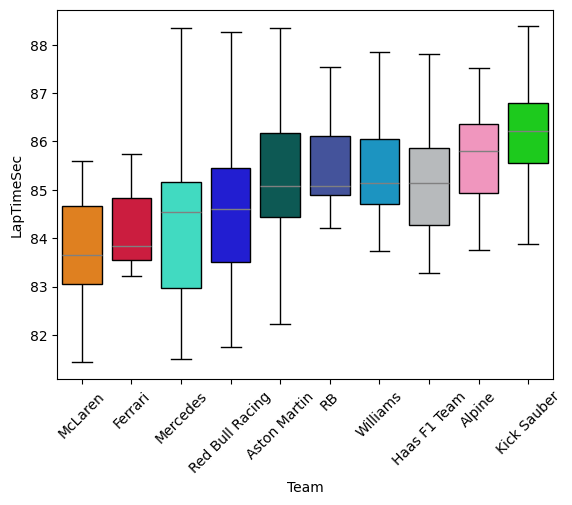

In [140]:
team_order = race_df[["Team", "LapTimeSec"]].groupby("Team").median()["LapTimeSec"].sort_values().index


team_palette = {}
for team in team_order:
    team_palette[team] = fastf1.plotting.get_team_color(team, session=race)

sns.boxplot(
    data=race_df,
    x="Team",
    y="LapTimeSec",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="black"),
    boxprops=dict(edgecolor="black"),
    medianprops=dict(color="grey"),
    capprops=dict(color="black"),
    showfliers=False
)

plt.grid(visible=False)
plt.xticks(rotation=45)

plt.show()


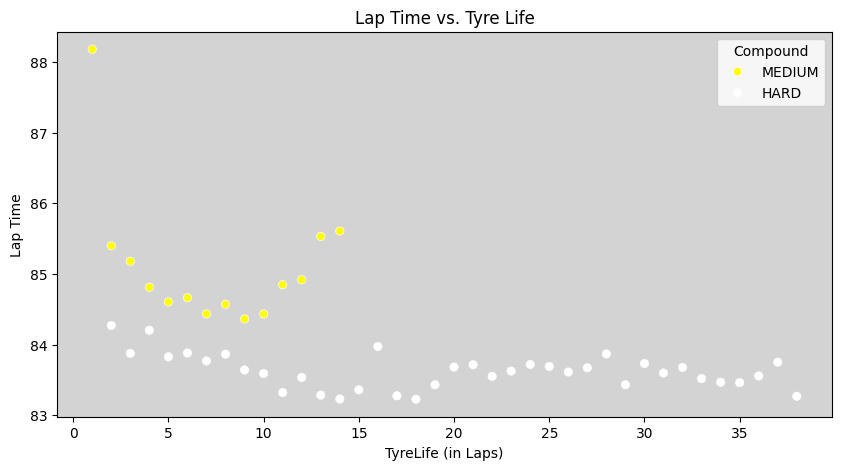

In [152]:
mean_lap_time = race_df["LapTimeSec"].mean()
std_lap_time = race_df["LapTimeSec"].std()

lower_bound = mean_lap_time - std_lap_time
upper_bound = mean_lap_time + std_lap_time

lec_data = race_df[race_df["Driver"] == "LEC"] 
filtered_data = lec_data[(lec_data["LapTimeSec"] >= lower_bound) & (lec_data["LapTimeSec"] <= upper_bound)]

palette_tires = {
    "HARD": "white",
    "MEDIUM": "yellow",
    "SOFT": "red"
}

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    data=filtered_data,
    x="TyreLife",
    y="LapTimeSec",
    hue="Compound",
    palette = palette_tires,
    ax=ax
)

plt.title("Lap Time vs. Tyre Life")
plt.xlabel("TyreLife (in Laps)")
plt.ylabel("Lap Time")
ax.set_facecolor('lightgray')

plt.show()

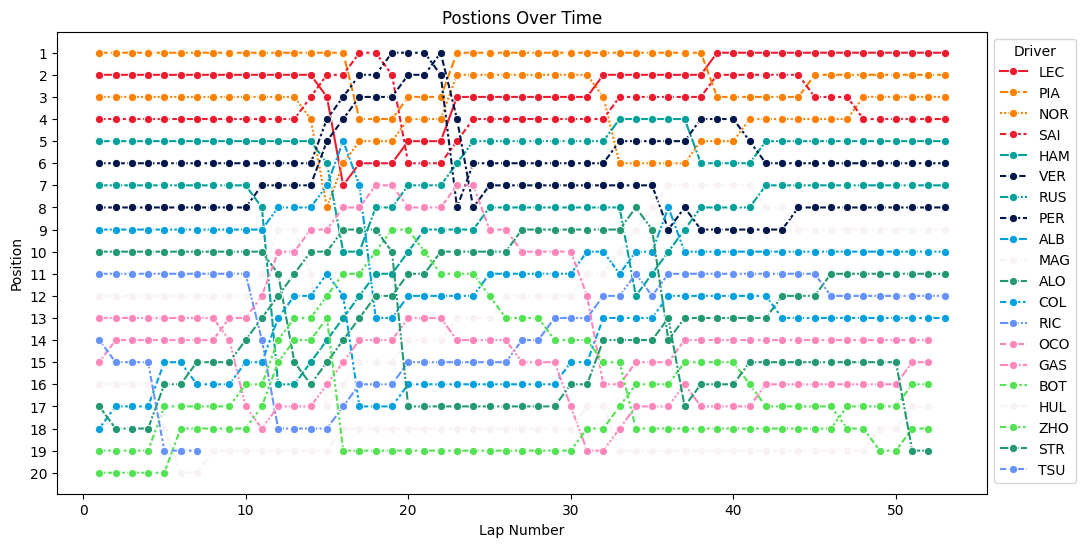

In [142]:
driver_palette = {
    'VER': '#00174C',  
    'PER': '#00174C',  
    'LEC': '#EF1A2D',  
    'SAI': '#EF1A2D',  
    'HAM': '#00A19B',  
    'RUS': '#00A19B', 
    'NOR': '#FF8000',  
    'PIA': '#FF8000',  
    'OCO': '#FF87BC',  
    'GAS': '#FF87BC',  
    'ALO': '#229971', 
    'STR': '#229971',  
    'TSU': '#6692FF',  
    'RIC': '#6692FF',  
    'BOT': '#52E252',  
    'ZHO': '#52E252', 
    'ALB': '#00A0DE',
    'COL': '#00A0DE',  
    'MAG': '#F9F2F2',  
    'HUL': '#F9F2F2'   
}

line_styles = {
    'VER': 'solid',
    'PER': 'dashed',
    'LEC': 'solid',
    'SAI': 'dashed',
    'HAM': 'solid',
    'RUS': 'dashed',
    'NOR': 'solid',
    'PIA': 'dashed',
    'OCO': 'solid',
    'GAS': 'dashed',
    'ALO': 'solid',
    'STR': 'dashed',
    'TSU': 'solid',
    'RIC': 'dashed',
    'BOT': 'solid',
    'ZHO': 'dashed',
    'ALB': 'solid',
    'COL': 'dashed',
    'MAG': 'solid',
    'HUL': 'dashed'
}

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=race_df,
    x="LapNumber",
    y="Position",
    hue="Driver",
    marker='o',
    palette=driver_palette,
    style="Driver",
    ax=ax
)

plt.title("Postions Over Time")
plt.xlabel("Lap Number")
plt.ylabel("Position")
plt.legend(title="Driver", bbox_to_anchor=(1, 1), loc='upper left')
ax.invert_yaxis()
ax.set_yticks(range(1, 21))  
ax.set_yticklabels(range(1, 21)) 

plt.show()


**Download dataframes**

In [73]:
race_df.to_csv('race.csv')

In [74]:
quali_df.to_csv('quali.csv')